# Ensemble Learning :
is a technique that combines multiple machine learning models to improve overall performance. The idea is to leverage the strengths of each model while mitigating their weaknesses. Ensemble methods can be broadly categorized into two types: bagging and boosting.

Bagging (Bootstrap Aggregating) involves training multiple models independently on different subsets of the data and then combining their predictions. This helps to reduce variance and prevent overfitting. Random Forest is a popular bagging algorithm that builds multiple decision trees and averages their predictions.

Boosting, on the other hand, trains models sequentially, with each new model focusing on the errors made by the previous ones. This approach aims to reduce bias and improve overall accuracy. AdaBoost and Gradient Boosting are well-known boosting algorithms.

Ensemble learning is widely used in practice and often leads to better performance than individual models.

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# ENSEMBLE Techniques :
### 1. Max Voting :
In max voting, each model in the ensemble votes for a class label, and the class with the most votes is selected as the final prediction. This technique is commonly used for classification tasks.
### 2. Averaging :
In averaging, the predictions of each model are averaged to produce the final prediction. This technique is commonly used for regression tasks.
### 3. Stacking :
In stacking, multiple models are trained to predict the same target variable, and their predictions are combined using another model (meta-model) to produce the final prediction. This technique can improve predictive performance by leveraging the strengths of different models.
### 4. Bagging :
In bagging (Bootstrap Aggregating), multiple models are trained on different subsets of the training data, and their predictions are combined (e.g., by averaging or voting) to produce the final prediction. This technique can help reduce overfitting and improve model stability.
### 5. Boosting :
In boosting, multiple models are trained sequentially, with each model trying to correct the errors of the previous one. The final prediction is made by combining the predictions of all models, often using a weighted average. This technique can improve predictive performance, especially for difficult tasks.
### 6. Blending :
In blending, multiple models are trained on the same training data, and their predictions are combined using a simple averaging or weighted averaging approach. This technique is similar to stacking but typically uses a holdout validation set to generate the final predictions.
### 7. Weighted Averaging :
In weighted averaging, the predictions of each model are combined using a weighted average, where the weights are determined based on the performance of each model on a validation set. This technique can help improve the final prediction by giving more importance to better-performing models.

# Bagging (Bootstrap Aggregating)
In bagging (Bootstrap Aggregating), multiple models are trained on different subsets of the training data, and their predictions are combined (e.g., by averaging or voting) to produce the final prediction. This technique can help reduce overfitting and improve model stability.
### 1. Bagging meta-algorithm
The bagging meta-algorithm involves the following steps:
1. Generate multiple bootstrap samples from the training data.
2. Train a separate model on each bootstrap sample.
3. Combine the predictions of all models (e.g., by averaging or voting) to produce the final prediction.
### 2. Bagging algorithms
Some popular bagging algorithms include:
1. Random Forest: An ensemble of decision trees trained on different bootstrap samples, with feature randomness added to each split.
2. Bagged Decision Trees: A simple bagging approach applied to decision trees, where each tree is trained on a different bootstrap sample.

# Boosting Algorithm :
In boosting, multiple models are trained sequentially, with each model trying to correct the errors of the previous one. The final prediction is made by combining the predictions of all models, often using a weighted average. This technique can improve predictive performance, especially for difficult tasks.
### 1. Boosting meta-algorithm
The boosting meta-algorithm involves the following steps:
1. Initialize the model with equal weights for all training instances.
2. Train a model on the weighted training data.
3. Update the instance weights based on the model's performance (e.g., increase weights for misclassified instances).
4. Repeat steps 2-3 for a fixed number of iterations or until convergence.
5. Combine the predictions of all models (e.g., by weighted voting) to produce the final prediction.
### 2. Boosting algorithms
Some popular boosting algorithms include:
1. AdaBoost: A boosting algorithm that adjusts the weights of misclassified instances and combines weak learners (e.g., decision stumps) to create a strong learner.
2. Gradient Boosting: A boosting algorithm that trains models sequentially, with each model trying to correct the errors of the previous one by minimizing a loss function.
3. XGBoost: An optimized implementation of gradient boosting that includes regularization and parallelization, making it faster and more efficient.
4. LightGBM: A gradient boosting framework that uses a histogram-based approach to accelerate training and reduce memory usage, making it suitable for large datasets.
5. CatBoost: A gradient boosting library that is particularly effective with categorical features and requires minimal data preprocessing.
6. HistGradientBoosting: A variant of gradient boosting that uses a histogram-based approach for faster training and lower memory usage, available in scikit-learn.
7. GradientBoostingClassifier: A scikit-learn implementation of gradient boosting for classification tasks.
8. GradientBoostingRegressor: A scikit-learn implementation of gradient boosting for regression tasks.



In [73]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=10000, noise=0.2, random_state=42)

In [74]:
df = pd.DataFrame({"feature1": x[:, 0], "feature2": x[:, 1], "target": y})

<Axes: xlabel='feature1', ylabel='feature2'>

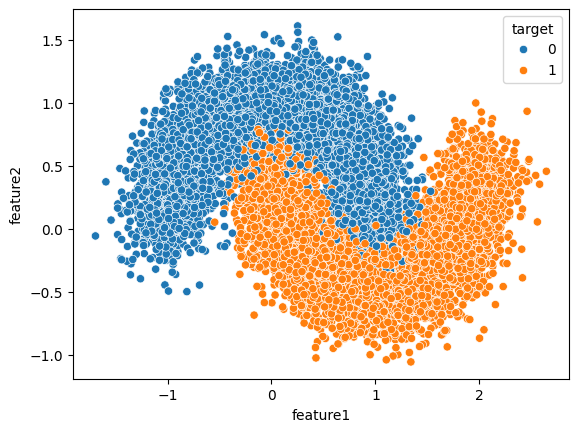

In [75]:
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")

In [76]:
x_a = x[:, 0]
x_b = x[:, 1]
y = y

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [79]:
DT = DecisionTreeClassifier()
SVC = SVC()
GNB = GaussianNB()

In [80]:
DT.fit(x_train, y_train) , SVC.fit(x_train, y_train) ,GNB.fit(x_train, y_train)

(DecisionTreeClassifier(), SVC(), GaussianNB())

In [81]:
DT.score(x_test, y_test)*100, SVC.score(x_test, y_test)*100, GNB.score(x_test, y_test)*100

(96.2, 97.7, 88.9)

In [82]:
DT.score(x_train, y_train)*100, SVC.score(x_train, y_train)*100, GNB.score(x_train, y_train)*100

(100.0, 97.0875, 86.725)

# Average Voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('dt', DT),
    ('svc', SVC),
    ('gnb', GNB)
], voting='hard')

voting_clf.fit(x_train, y_train)

In [83]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('dt', DT),
    ('svc', SVC),
    ('gnb', GNB)
], voting='hard')

voting_clf.fit(x_train, y_train)


,estimators,"[('dt', ...), ('svc', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [84]:
voting_clf.score(x_test, y_test)*100 , voting_clf.score(x_train, y_train)*100

(97.15, 98.0125)

In [85]:
prd = {
    'DT': DT.score(x_test, y_test)*100,
    'SVC': SVC.score(x_test, y_test)*100,
    'GNB': GNB.score(x_test, y_test)*100,
    'Voting': voting_clf.score(x_test, y_test)*100
}

In [86]:
prd

{'DT': 96.2, 'SVC': 97.7, 'GNB': 88.9, 'Voting': 97.15}

In [87]:
predicted = {
    'DT': DT.predict(x_test),
    'SVC': SVC.predict(x_test),
    'GNB': GNB.predict(x_test),
    'Voting': voting_clf.predict(x_test)
}

In [88]:
pd.DataFrame(predicted)

,DT,SVC,GNB,Voting
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
1995,0,0,0,0
1996,1,1,1,1
1997,0,0,0,0
1998,0,0,0,0


In [89]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/cgpa.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [90]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [93]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100 , lr.score(x_train, y_train)*100

(77.30984312051673, 77.58339025733345)

In [94]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_test, y_test)*100 , dtr.score(x_train, y_train)*100

(52.19733481708333, 95.1559200955432)

In [95]:
svr = SVR()
svr.fit(x_train, y_train)
svr.score(x_test, y_test)*100 , svr.score(x_train, y_train)*100

(75.94945442913422, 78.16909319813372)

In [96]:
from sklearn.ensemble import VotingRegressor

In [97]:
li = VotingRegressor(estimators=[('lr', lr), ('dtr', dtr), ('svr', svr)], n_jobs=-1)
li.fit(x_train, y_train)
li.score(x_test, y_test)*100 , li.score(x_train, y_train)*100

(75.16568331690885, 87.56852979319457)

In [98]:
df = {"lr": lr.predict(x_test), "dtr": dtr.predict(x_test), "svr": svr.predict(x_test), "li": li.predict(x_test)}

In [99]:
pd.DataFrame(df)

,lr,dtr,svr,li
0,2.780313,2.920000,2.745462,2.815259
1,3.136352,3.252500,3.111375,3.166742
2,3.199521,2.920000,3.186923,3.102148
3,2.389819,2.540000,2.407183,2.445667
4,3.526847,3.990000,3.603909,3.706919
5,3.768035,4.110000,3.864755,3.914263
6,3.165065,3.330000,3.145318,3.213461
7,2.544868,2.235000,2.544422,2.441430
8,3.176550,3.330000,3.159083,3.221878
9,3.492392,3.140000,3.560946,3.397779


# Bagging
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(base_estimator=lr, n_estimators=100, n_jobs=-1)
bagging.fit(x_train, y_train)
bagging.score(x_test, y_test)*100 , bagging.score(x_train, y_train)*100

In [100]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=10000, noise=0.2, random_state=42)

In [101]:
df = {"x1": x[:, 0], "x2": x[:, 1], "y": y}

In [102]:
dataset = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

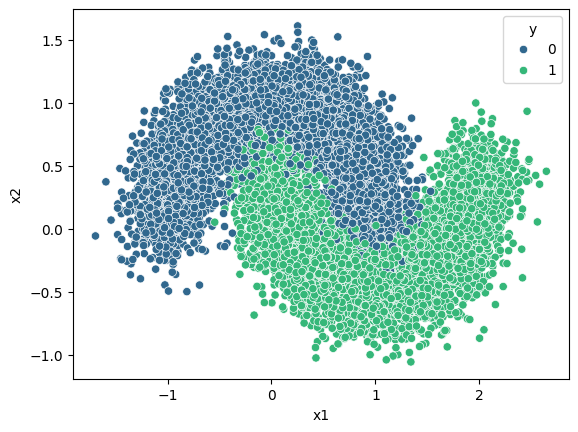

In [103]:
sns.scatterplot(data=dataset, x="x1", y="x2", hue="y", palette="viridis")

In [104]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [107]:
bg = BaggingClassifier(estimator=SVC(), n_estimators=20, random_state=42)

In [108]:
bg.fit(x_train, y_train)

,estimator,SVC()
,n_estimators,20
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [109]:
bg.score(x_test, y_test)*100 , bg.score(x_train, y_train)*100

(97.7, 97.05)

In [110]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [111]:
rf.score(x_test, y_test)*100 , rf.score(x_train, y_train)*100

(97.2, 99.8)

In [112]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/cgpa.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [113]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [116]:
bg = BaggingRegressor(estimator=LinearRegression(), n_estimators=10)
bg.fit(x_train, y_train)
bg.score(x_test, y_test)*100 , bg.score(x_train, y_train)*100

(77.55872509487239, 77.47715044081853)

In [117]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)*100 , rf.score(x_train, y_train)*100

(65.46166788342855, 91.58214370197177)

# Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=10, random_state=42)
gb.fit(x_train, y_train)
gb.score(x_test, y_test)*100 , gb.score(x_train, y_train)*100
1. AdaBoost

In [118]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the AdaBoost classifier
# We use a Decision Tree stump as the weak learner
weak_learner = DecisionTreeClassifier(max_depth=2, random_state=42)
adaboost_model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=100,  # The number of models to train sequentially
    learning_rate=0.5,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9825


In [119]:
adaboost_model.score(X_test, y_test)*100 , adaboost_model.score(X_train, y_train)*100

(98.24561403508771, 100.0)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)*100 , gb.score(X_train, y_train)*100

In [120]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=120,      # The number of sequential trees
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # The complexity of each tree
    random_state=42
)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")

Gradient Boosting Classifier Accuracy: 0.9561


# XGBoost :
is an implementation of gradient boosted decision trees designed for speed and performance.

In [127]:
# Import necessary libraries
import pandas as pd
# If you are on Mac OSX and see OpenMP errors, run this in your terminal:
# brew install libomp

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the XGBoost classifier
xgboost_model = xgb.XGBClassifier(
    n_estimators=100,      # The number of sequential trees
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # The complexity of each tree
    use_label_encoder=False, # To avoid a deprecation warning
    eval_metric='logloss', # Evaluation metric for the model
    random_state=42
)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")


XGBoost Classifier Accuracy: 0.9532


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:44:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
